A solution for: https://www.kaggle.com/datasets/nelgiriyewithana/emotions

Importing needed modules.

In [320]:
from pandas import read_csv
from matplotlib.pyplot import pie , figure , title , show , plot
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers , models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
#Instancinf of Tokenizer object.
tokenizer = Tokenizer(oov_token='<00U00>')

Loading data.

In [321]:
path  = 'text.csv'
file = read_csv(path)
df = file.copy()
df.sample(10)

,Unnamed: 0,text,label
95837,95837,i feel ecstatic don t worry we can make love a...,1
370979,370979,i put aside my principles when i am feeling ve...,2
191306,191306,i just cant be quiet when i feel the spirit ti...,1
285401,285401,i can see why people adored this character but...,0
162783,162783,i feel that he is very handsome and charming,1
233344,233344,i went into quali feeling pretty positive abou...,1
246744,246744,after my marriage i received the bsc results b...,1
330575,330575,i feel humiliated and feel like i can t show m...,0
56296,56296,i was feeling very uncertain of myself,4
110794,110794,i am feeling peaceful and just plain happy its...,1


In [322]:
#Droping first column.
df = df[['text','label']]

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [324]:
#Droping duplicated values.
df = df.drop_duplicates()

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416123 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416123 non-null  object
 1   label   416123 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [326]:
df.label.value_counts()

label
1    140779
0    120989
3     57235
4     47664
2     34497
5     14959
Name: count, dtype: int64

In [327]:
label_percents = [df.label.to_list().count(lbl) for lbl in df.label.unique()]

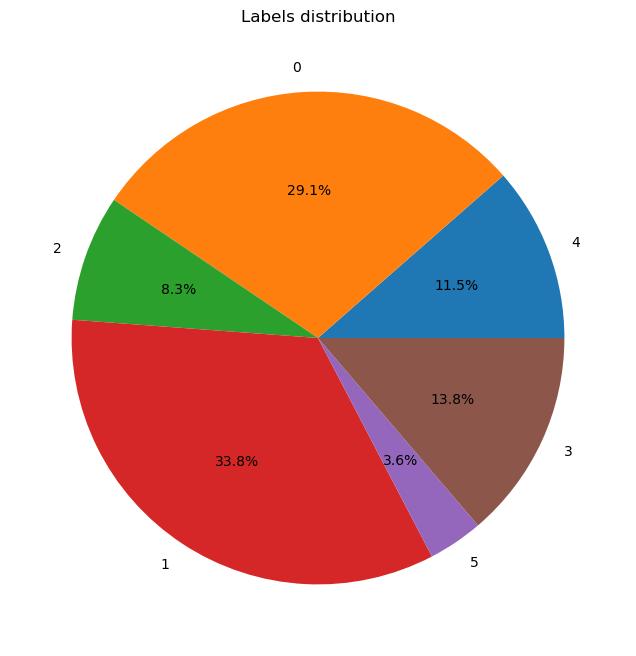

In [328]:
figure(figsize=(8,8))
pie(label_percents,labels=df.label.unique(),autopct='%1.1f%%')
title('Labels distribution')
show()

In [329]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [330]:
features = [Filter(note) for note in df.text]

Preprocessing texts.

In [331]:
tokenizer.fit_on_texts(features)
sequences = tokenizer.texts_to_sequences(features)
mxlen = 100
matrix = pad_sequences(sequences,padding='post',truncating='post',maxlen=mxlen)

Preprocessing labels.

In [332]:
labels = df.label.to_numpy().reshape(-1,1)
labels = to_categorical(labels)

Spliting data into train and test sets.

In [333]:
xtr , xts , ytr , yts = train_test_split(matrix,df.label.to_numpy(),test_size=0.2,random_state=32)
print(f'Train size {len(ytr)}\nTest size: {len(yts)}')

Train size 332898
Test size: 83225


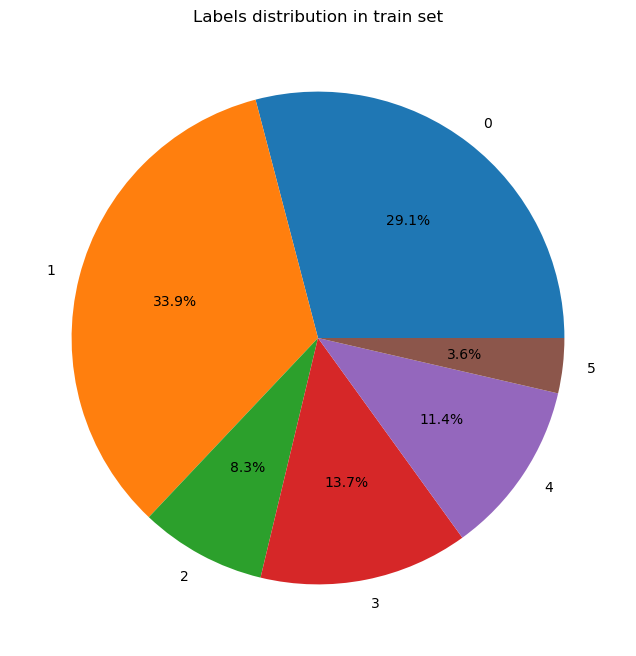

In [334]:
figure(figsize=(8,8))
pie([ytr.tolist().count(l) for l in list(set(ytr.tolist()))],labels=list(set(ytr.tolist())),autopct='%1.1f%%')
title('Labels distribution in train set')
show()

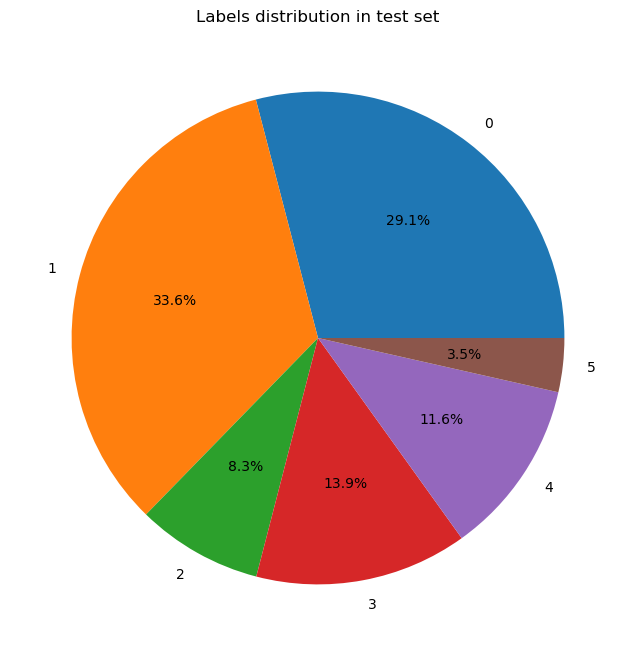

In [335]:
figure(figsize=(8,8))
pie([yts.tolist().count(l) for l in list(set(yts.tolist()))],labels=list(set(yts.tolist())),autopct='%1.1f%%')
title('Labels distribution in test set')
show()

In [336]:
xtr , xts , ytr , yts = train_test_split(matrix,labels,test_size=0.2,random_state=32)

Creating an Embedding model.

In [337]:
model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,6,input_length=mxlen),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(6,activation='softmax')])
#Compiling The model.
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [338]:
#data train.
history = model.fit(xtr,ytr,epochs=5,validation_data=(xts,yts))

Epoch 1/5
10404/10404 [==============================] - 60s 6ms/step - loss: 1.4166 - accuracy: 0.4850 - val_loss: 1.0619 - val_accuracy: 0.6426
Epoch 2/5
10404/10404 [==============================] - 55s 5ms/step - loss: 0.6680 - accuracy: 0.8147 - val_loss: 0.4122 - val_accuracy: 0.8755
Epoch 3/5
10404/10404 [==============================] - 41s 4ms/step - loss: 0.3164 - accuracy: 0.8986 - val_loss: 0.2742 - val_accuracy: 0.8999
Epoch 4/5
10404/10404 [==============================] - 41s 4ms/step - loss: 0.2393 - accuracy: 0.9098 - val_loss: 0.2414 - val_accuracy: 0.8992
Epoch 5/5
10404/10404 [==============================] - 52s 5ms/step - loss: 0.2144 - accuracy: 0.9138 - val_loss: 0.2320 - val_accuracy: 0.8976


Visualize models performance

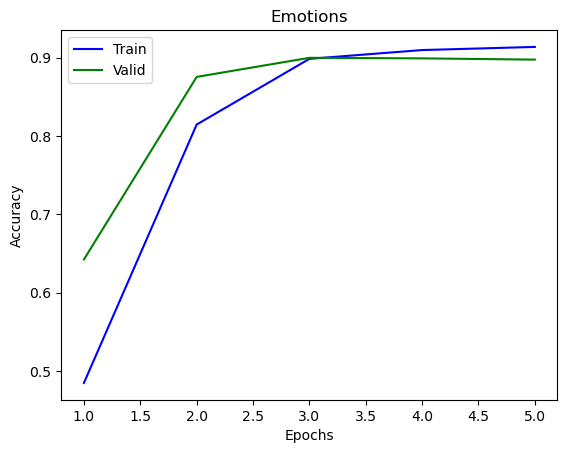

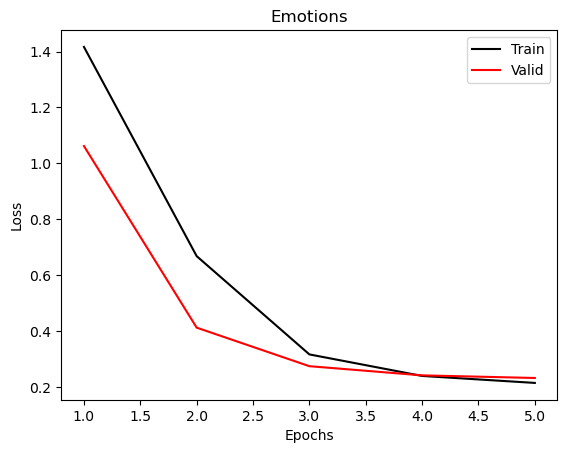

In [339]:
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['accuracy'],'blue')
plot(epoch,results['val_accuracy'],'green')
xlabel('Epochs')
ylabel('Accuracy')
title('Emotions')
legend(['Train','Valid'])
show()
plot(epoch,results['loss'],'black')
plot(epoch,results['val_loss'],'red')
xlabel('Epochs')
ylabel('Loss')
title('Emotions')
legend(['Train','Valid'])
show()

End